In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [22]:
filename = '/Users/jayshinde/Downloads/Q.jpg'
img = cv2.imread(filename)

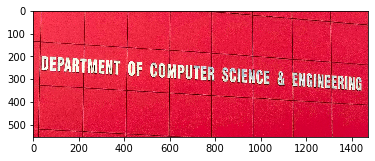

In [23]:

#Convert image to RGB because OpenCV reads as BGR, and Matplotlib as RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Image copy
image_copy = img_rgb
plt.imshow(img_rgb)

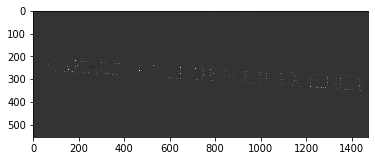

In [24]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')

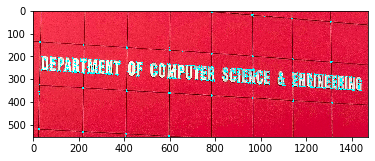

In [25]:
# Threshold value
threshold = 0.01*dst.max()

# Overlap corners on image copy
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image if greater than threshold
for i in range(0, dst.shape[0]):
    for j in range(0, dst.shape[1]):
        if(dst[i,j] > threshold):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (j, i), 1, (0,255,255), 1)

plt.imshow(corner_image)